In [2]:
from google.cloud import storage

path_to_private_key = 'is3107-418903-a6116d294003.json'

storage_client = storage.Client.from_service_account_json(json_credentials_path=path_to_private_key)

In [3]:
def download_blob(bucket_name,source_blob_name, destination_file_name):
        bucket = storage_client.bucket(bucket_name)
        blob = bucket.blob(source_blob_name)
        blob.download_to_filename(destination_file_name)
    

# download model
download_blob('is3107-model', 'ml_model/modelRF.pkl', 'modelRF.pkl')

# download model dataset
download_blob('is3107-model', 'ml_model/dataset.csv', 'dataset.csv')

In [4]:
%pip install -U scikit-learn==1.3.2

Note: you may need to restart the kernel to use updated packages.


In [5]:
import joblib
import pandas as pd

modelRF = joblib.load('modelRF.pkl')
data = pd.read_csv('dataset.csv')

In [6]:
data.columns

Index(['owners', 'eng_cap', 'price', 'depreciation', 'mileage', 'power',
       'coe_left', 'omv', 'arf', 'model_seats', 'model_weight_kg',
       'model_engine_cyl', 'model_fuel_cap_l', 'coe_premium',
       'years_since_reg', 'model_body_Others', 'model_body_SUV',
       'model_body_Sedan', 'model_body_Wagon', 'model_transmission_type_CVT',
       'model_transmission_type_Manual', 'model_drive_Front Wheel Drive',
       'model_drive_Rear Wheel Drive', 'model_engine_fuel_Electric',
       'model_engine_fuel_Hybrid', 'model_engine_fuel_Premium',
       'model_engine_fuel_Regular', 'brands'],
      dtype='object')

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

y = data['price']
x = data.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}



grid_searchRF = GridSearchCV(modelRF, param_grid, cv=5, scoring='accuracy')

# Fit on your data
grid_searchRF.fit(X_train, y_train)
best_params = grid_searchRF.best_params_
best_estimator = grid_searchRF.best_estimator_
best_predictions = best_estimator.predict(X_test)

/Users/isabel/opt/anaconda3/envs/IS3107/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/isabel/opt/anaconda3/envs/IS3107/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/isabel/opt/anaconda3/envs/IS3107/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/isabel/opt/anaconda3/envs/IS3107/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  

# Predict on user input

In [8]:
data_dict = {
    "owners": 1,
    "eng_cap": 2981.0,
    "depreciation": 72740.0,
    "mileage": 41000.0,
    "power": 272.0,
    "coe_left": 5.01,
    "omv": 130138.0,
    "arf": 206249.0,
    "model_seats": 4,
    "model_weight_kg": 1429.9319727891157,
    "model_engine_cyl": 6,
    "model_fuel_cap_l": 63.9665,
    "coe_premium": 102001,
    "years_since_reg": 5,
    "model_body_Others": False,
    "model_body_SUV": False,
    "model_body_Sedan": False,
    "model_body_Wagon": False,
    "model_transmission_type_CVT": False,
    "model_transmission_type_Manual": True,
    "model_drive_Front Wheel Drive": False,
    "model_drive_Rear Wheel Drive": True,
    "model_engine_fuel_Electric": False,
    "model_engine_fuel_Hybrid": False,
    "model_engine_fuel_Premium": True,
    "model_engine_fuel_Regular": False,
    "brands": 3.0
}

    #     "price": 468000.0,


In [9]:
data_df = pd.DataFrame([data_dict])

In [10]:
data_df

,owners,eng_cap,depreciation,mileage,power,coe_left,omv,arf,model_seats,model_weight_kg,...,model_body_Wagon,model_transmission_type_CVT,model_transmission_type_Manual,model_drive_Front Wheel Drive,model_drive_Rear Wheel Drive,model_engine_fuel_Electric,model_engine_fuel_Hybrid,model_engine_fuel_Premium,model_engine_fuel_Regular,brands
0,1,2981.0,72740.0,41000.0,272.0,5.01,130138.0,206249.0,4,1429.931973,...,False,False,True,False,True,False,False,True,False,3.0


In [11]:
predictions = best_estimator.predict(data_df)

In [12]:
print("The predicted price is : ", predictions[0])

The predicted price is :  484367.92649332044


In [13]:
importances = best_estimator.feature_importances_


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

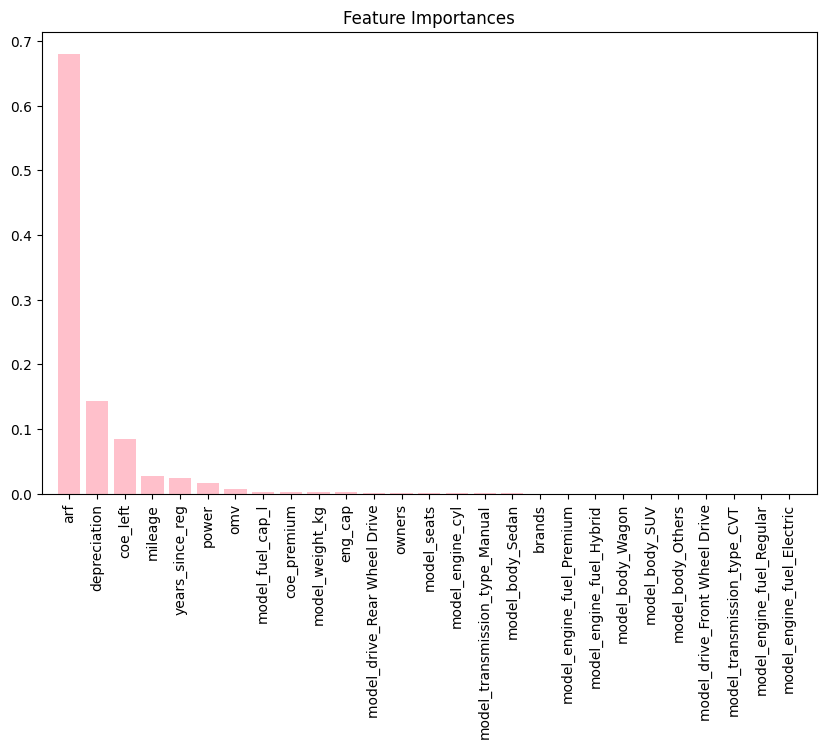

In [15]:
sns.set_palette('husl', n_colors=len(importances))  # 'husl' is a colorful palette; you can change it to other options like 'viridis', 'rocket', etc.

plt.figure(figsize=(10, 6))
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], color='pink', align='center')
plt.xticks(range(len(importances)), X_train.columns[indices], rotation=90)
plt.xlim([-1, len(importances)])
plt.show()